## Part 1

In [15]:
# seq = "PPPPHHPHHPPHHPHHPPHH"
seq = "HHPPHHPHHPPHHPHHPPHH"
# "HHPPHHPHHPPHHPHHPPHH" #original

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
direction_coords = [(0,1), (1, 0), (-1, 0), (0, -1)]
dirs = ["N", "E", "W", "S"]
direct_dict = dict(zip(dirs, direction_coords))
x, y = zip(*direction_coords)
print(x, y)

(0, 1, -1, 0) (1, 0, 0, -1)


In [4]:
direct_dict

{'N': (0, 1), 'E': (1, 0), 'W': (-1, 0), 'S': (0, -1)}

In [5]:
def possible_directions(point):
    """
    Outputs all possible next coordinates given an x,y point
    """
    directions = [(point[0]+1, point[1]),
                  (point[0]-1, point[1]),
                  (point[0], point[1]-1),
                  (point[0], point[1]+1)
                 ]
    return directions

def pathfinder(x, y):
    """
    Defines path given set of x and y coordinates
    """
    current_position = (x[0], y[0])
    path=""
    for k in range(1, len(x)):
        if x[k]>current_position[0]:
            path += "E"
        elif x[k]<current_position[0]:
            path += "W"
        elif y[k]>current_position[1]:
            path += "N"
        elif y[k]<current_position[1]:
            path += "S" 
        current_position = (x[k], y[k])
    return path
    
    
def randomFold(seq): 
    """
    Generate random non crossing path
    """
#     print("random fold generation started")
    length = 0
    while length!=len(seq):
        path=[]
        current_position = (0, 0)
        visited=[]
        for k in range(len(seq)):
            visited.append(current_position)
            all_directions = possible_directions(current_position)
            next_x, next_y = zip(*all_directions)
            
    #         print("\ncurrent_position", current_position)
            possible_coords = zip(next_x, next_y)
    #         print("possible_coords", possible_coords)

            new_possible_coords=[]
            # check 1 step ahead
            for j in possible_coords:
    #             ~print(j)
                one_step_ahead = possible_directions(j) # list of coordinates 1 step ahead of j, check if they are in visited
                one_step_x, one_step_y = zip(*one_step_ahead)
                one_step_ahead_coords = zip(one_step_x, one_step_y)
                one_step_check = [k for k in one_step_ahead_coords if k not in visited]

    #             print(one_step_check)
                if len(one_step_check)>2:
                    new_possible_coords.append(j)
                
            not_visited_indices = [i for i, coord in enumerate(new_possible_coords) if coord not in visited] # indices
            if len(not_visited_indices)==0: # no more coordinates to visit, therefore we are at a dead end
                x, y= zip(*visited)

                x = [k+abs(min(x)) for k in x]
                y = [k+abs(min(y)) for k in y]
                path = pathfinder(x, y)
                break # break foor loop and continue on to next iteration of while loop
            else:
                random_idx = random.choice(range(len(not_visited_indices)))

                current_position = new_possible_coords[not_visited_indices[random_idx]]

        
        x, y= zip(*visited)

        x = [k+abs(min(x)) for k in x]
        y = [k+abs(min(y)) for k in y]
        path = pathfinder(x, y)
        length = len(path)+1
        
    return x, y, list(path)


    
# length = 0
# while length!=len(seq):
#     x, y, path = randomFold(seq)
#     length = len(path)
# drawFold(x, y, seq, True)

# for k in range(1000):
#     print(k)
#     x, y, path = randomFold(seq)
# #     print("path for below fold", path)
# #     print("x and y for below", list(zip(x, y)))
#     drawFold(x, y, seq, True)
    
#     drawFold(x, y, seq, True)

In [6]:
def drawFold(x, y, seq, show):
    """
    Converts sequence and coordinates into matrix representation
    
    Matrix representation is necessary for energy function calculations
    
    """
#     print("draw fold started")
    c=1;

    # draw fold onto matrix
#     print(max(x), max(y))
    folded_matrix = np.zeros((max(y)+3, max(x)+3))
#     print(folded_matrix)

    for k in range(len(seq)):
#             print(k)
#             print(y[k], x[k])
        folded_matrix[y[k]+1][x[k]+1] = int(c)
        c+=1;
            
#     path_list = ''.join([str(x) for x in path])
    
    colors  = []
    for k in seq:
        if k=="H":
            colors.append("r")
        else:
            colors.append("b")
            
    if show==True:
        fig = plt.figure()
        for k in range(len(seq)):
            plt.scatter(x[k], y[k], color=colors[k])

        plt.xticks(np.arange(min(x), max(y), step=1))
        plt.yticks(np.arange(min(y), max(y), step=1))
        plt.plot(x, y)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
        
        #     print(folded_matrix)
#     print("complete")
    return folded_matrix.astype(int)

# fold = drawFold(x, y)


In [7]:
def energy(seq, fold): 
    """calculates energy of given protein fold
    """
#     print("energy calc started")
    H=0;
    visited=set()
    for k in range(1,len(fold)-1):
        for j in range(1,len(fold[0])-1):
#             print("fold[k][j]", fold[k][j])
            if fold[k][j]!=0 and seq[fold[k][j]-1]=="H":
#                 print("fold[k][j]", fold[k][j], "H")
                if fold[k][j+1]!=0 and abs(fold[k][j+1]-fold[k][j])>1 and seq[fold[k][j+1]-1]=="H":   # E
#                     print("fold[k][j]", fold[k][j])
#                     print("E")
                    if (fold[k][j], fold[k][j+1]) not in visited:
                        H-=3
                        visited.add((fold[k][j], fold[k][j+1]))
                        visited.add((fold[k][j+1], fold[k][j]))
                    
                if fold[k][j-1]!=0 and abs(fold[k][j-1]-fold[k][j])>1 and seq[fold[k][j-1]-1]=="H":   # W
#                     print("fold[k][j]", fold[k][j])
#                     print("W")
                    if (fold[k][j], fold[k][j-1]) not in visited:
                        H-=3
                        visited.add((fold[k][j], fold[k][j-1]))
                        visited.add((fold[k][j-1], fold[k][j]))
                    
                if fold[k+1][j]!=0 and abs(fold[k+1][j]-fold[k][j])>1 and seq[fold[k+1][j]-1]=="H":   # S
#                     print("fold[k][j]", fold[k][j])
#                     print("S")
                    if (fold[k][j], fold[k+1][j]) not in visited:
                        H-=3
                        visited.add((fold[k][j], fold[k+1][j]))
                        visited.add((fold[k+1][j], fold[k][j]))
                    
                if fold[k-1][j]!=0 and abs(fold[k-1][j]-fold[k][j])>1 and seq[fold[k-1][j]-1]=="H": # N
#                     print("fold[k][j]", fold[k][j])
#                     print("N")
                    if (fold[k][j], fold[k-1][j]) not in visited:
                        H-=3
                        visited.add((fold[k][j], fold[k-1][j]))
                        visited.add((fold[k-1][j], fold[k][j]))
#     print(visited)
#     print("Energy score is ", H)
#     print("complete")
    return H
# energy(seq, fold)

# fold = np.array([    [0,  0,    0,  0,  0],
#                      [0,  1,    6,  7,  8],
#                      [0,  2,    5,  8,  0],
#                      [0,  3,    4,  9,  0],
#                      [0,  12,   11, 10, 0],
#                      [0,  0,    0,  0,  0]])

# seq = "PHHHHPPHPPHH"

# energy(seq, fold)

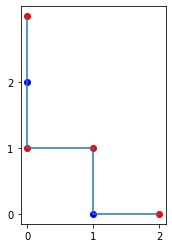

NameError: name 'showPath' is not defined

In [8]:
import itertools
def randomFoldChange(p, seq): # maintain non crossing
    """
    Randomly changes input path slightly
    """
    input_path = list(p)
    non_crossing=False
    c=0
    tried_changes = list(zip(list(range(len(input_path))), input_path))
    indices = range(len(p))
    possible_changes = list(itertools.product(indices,dirs))
    
    while non_crossing==False:
        visited=[]
        c+=1
        x=[0]
        y=[0]
        new_x = 0
        new_y = 0
        
        new_path = list(input_path) # assign new path as the input path to be changed
        choices = [k for k in possible_changes if k not in tried_changes]
        
        change = random.choice(choices)
        new_path[change[0]] = change[1]
        
        non_crossing=True
        ############ SELF AVOIDING CHECK: ##############
        for k in range(len(new_path)):
            visited.append((new_x, new_y))
#             print(x[-1], y[-1])
            new_coords = direct_dict[new_path[k]]
#             print(new_coords)
            new_x, new_y = x[-1]+new_coords[0], y[-1]+new_coords[1]
#             print(new_x, new_y)

#             print(visited)
            if (new_x, new_y) in visited: # crosses if in visited
                
                non_crossing=False

                break
            else:
                x.append(new_x)
                y.append(new_y)
        
        # if true, use as final output
        # else redo
        if non_crossing==True:
            x = [k+abs(min(x)) for k in x]
            y = [k+abs(min(y)) for k in y]
            fold = drawFold(x, y, seq, False)
            return fold, new_path
        else:
            tried_changes.append(change)
            
    return None


x, y, path = randomFold(seq)
# print("random fold generated")

fold = drawFold(x, y, seq, True)
# print("path for above fold", path)

randomFoldChange(path, seq)

showPath(path, seq)

In [10]:
import matplotlib.pyplot as plt

def showPath(s,aa=None):
    """
    Plots a  path given a NEWS path string s and (optional) amino acid (H/P) string aa
    """
    if aa is None:
        aa = '0'*(len(s)+1)
    plt.figure()
    ax = plt.axes()
    x0 = y0 = 0
    x1 = y1 = 0
    assert len(aa)==len(s)+1
    i = 0
    U = set()
    
    def plotAA():
        if aa[i]=='H':
            plt.plot(x1,y1,'bo')
        elif aa[i]=='P':
            plt.plot(x1,y1,'rs')
        else:
            plt.plot(x1,y1,'k.')
    plotAA()
    for c in s:
        U.update([(x0,y0)])
        if c=='N':
            y1 = y0+1
            x1 = x0
        elif c=='S':
            y1 = y0-1
            x1 = x0
        elif c=='E':
            y1 = y0
            x1 = x0+1
        elif c=='W':
            y1 = y0
            x1 = x0-1

        i+=1
        assert (x1,y1) not in U #self-avoiding check
        ax.arrow(x0, y0, x1-x0, y1-y0,head_width=0.05, head_length=0.05, fc='k', ec='k')
        plotAA()
        
        #print x0,y0,x1,y1
        x0=x1
        y0=y1
#     xmin = ymin = -len(s)
#     xmax = ymax = len(s)
#     plt.axis([xmin,xmax,ymin,ymax])
#     minor_ticks = range(xmin,xmax)
#     ax.set_xticks(minor_ticks, minor=True)                                           
#     ax.set_yticks(minor_ticks, minor=True)  
#     ax.grid(which='both')        
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    return U

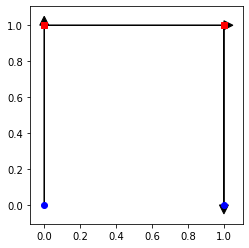

{(0, 0), (0, 1), (1, 1)}

In [11]:
showPath("NES", "HPPH")

T: 100 , cooling rate: 0.95 , avg energy score:  -9.0
T: 100 , cooling rate: 0.953 , avg energy score:  -9.0
T: 100 , cooling rate: 0.956 , avg energy score:  -9.0
T: 100 , cooling rate: 0.959 , avg energy score:  -9.0
T: 100 , cooling rate: 0.962 , avg energy score:  -9.0
T: 100 , cooling rate: 0.965 , avg energy score:  -9.0
T: 100 , cooling rate: 0.968 , avg energy score:  -9.0
T: 100 , cooling rate: 0.971 , avg energy score:  -9.0
T: 100 , cooling rate: 0.974 , avg energy score:  -9.0
T: 100 , cooling rate: 0.977 , avg energy score:  -9.0
T: 100 , cooling rate: 0.98 , avg energy score:  -9.0
T: 100 , cooling rate: 0.983 , avg energy score:  -9.0
T: 100 , cooling rate: 0.986 , avg energy score:  -9.0
T: 100 , cooling rate: 0.989 , avg energy score:  -9.0
T: 100 , cooling rate: 0.992 , avg energy score:  -6.0
T: 100 , cooling rate: 0.995 , avg energy score:  -6.0
T: 100 , cooling rate: 0.998 , avg energy score:  -3.0
T: 110 , cooling rate: 0.95 , avg energy score:  -9.0
T: 110 , cool

T: 180 , cooling rate: 0.995 , avg energy score:  -6.0
T: 180 , cooling rate: 0.998 , avg energy score:  -3.0
T: 190 , cooling rate: 0.95 , avg energy score:  -9.0
T: 190 , cooling rate: 0.953 , avg energy score:  -9.0
T: 190 , cooling rate: 0.956 , avg energy score:  -9.0
T: 190 , cooling rate: 0.959 , avg energy score:  -9.0
T: 190 , cooling rate: 0.962 , avg energy score:  -9.0
T: 190 , cooling rate: 0.965 , avg energy score:  -9.0
T: 190 , cooling rate: 0.968 , avg energy score:  -9.0
T: 190 , cooling rate: 0.971 , avg energy score:  -9.0
T: 190 , cooling rate: 0.974 , avg energy score:  -9.0
T: 190 , cooling rate: 0.977 , avg energy score:  -9.0
T: 190 , cooling rate: 0.98 , avg energy score:  -9.0
T: 190 , cooling rate: 0.983 , avg energy score:  -9.0
T: 190 , cooling rate: 0.986 , avg energy score:  -9.0
T: 190 , cooling rate: 0.989 , avg energy score:  -9.0
T: 190 , cooling rate: 0.992 , avg energy score:  -9.0
T: 190 , cooling rate: 0.995 , avg energy score:  0.0
T: 190 , cool

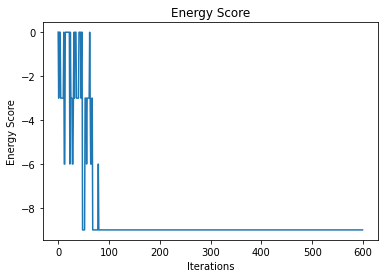

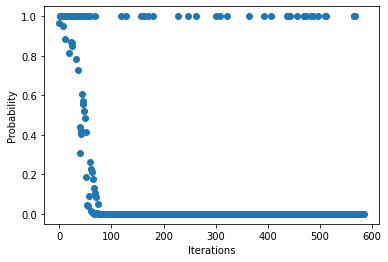

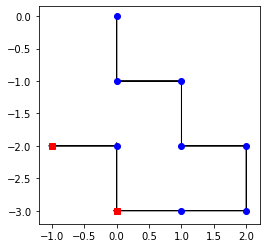

Temp                  100
Cooling Rate         0.95
Iters                 600
Energy Score           -9
Path            SESESWWNW
Name: 0, dtype: object


In [42]:
def simulated_annealing(iters, temps, cooling_rates):
    """
    Carries out simulated annealing on variable "seq" defined outside of function
    
    Also carries out hyperparameter tuning across input parameter arrays to find min. energy structure
    """
    final_scores=[]
    scores_list = [] # list of 600 length lists
    probs_list = []
    for a in range(len(temps)):
        for c in range(len(cooling_rates)):
            
            cooling_rate = cooling_rates[c]
            T = temps[a]
            avg_scores=[]
            probs = []
            x, y, path = randomFold(seq)
            fold = drawFold(x, y, seq, False)
            old_energy = energy(seq, fold)

    #                 print("old energy", old_energy)
    #                 print("energy for random fold calculated")

            scores = []
    #                 print(scores)
            for k in range(iters):
                T = T*cooling_rates[c]
                changed_fold, new_path = randomFoldChange(path, seq) # changes path and calls drawFold on new path
                changed_fold, new_path = randomFoldChange(new_path, seq) # changes path and calls drawFold on new path
                changed_fold, new_path = randomFoldChange(new_path, seq) # changes path and calls drawFold on new path
    #                     print("fold changed")
    #                     print("2. path for above fold", new_path)
                new_energy = energy(seq, changed_fold)
                scores.append(old_energy)

                if new_energy<old_energy: # aim is to minimise energy function
                    old_energy = new_energy
                    path = new_path
                else:
                    prob = np.exp(-abs(old_energy - new_energy)/float(T), dtype=np.float64)
#                     if prob==0:
#                         print(prob, old_energy, new_energy, T)
                    probs.append(prob)
        #             print("energy diff", old_energy - new_energy)
        #             print("temp", T)
            #         a = (old_energy-new_energy)/float(T)
            #         print(a)
        #             print(prob)
                    if prob>random.uniform(0,1):
                        old_energy = new_energy
                        path = new_path
    #                 print(avg_scores)
            avg_scores.append(scores[-1])
            scores_list.append(scores)
            probs_list.append(probs)
    #                 plt.plot(iterations, scores)
    #                 plt.xlabel('iterations')
    #                 plt.ylabel('scores')
    #                 plt.show()
    #                     print(scores)
    #                     print("best score", scores[-1])
    #                 print(avg_scores)
            final_scores.append([temps[a], cooling_rate, iters, np.mean(avg_scores), "".join(path)])
            print("T:", temps[a], ", cooling rate:", cooling_rate, ", avg energy score: ", np.mean(avg_scores))

    df = pd.DataFrame(data = final_scores, columns=['Temp', 'Cooling Rate', 'Iters', 'Energy Score', 'Path'])
    maxix = df[['Energy Score']].idxmin()[0]
    optimal_params = list(df.iloc[maxix, :])# for k in range(len(scores_list)):
    plt.plot(list(range(iters)), scores_list[maxix])
    plt.xlabel('Iterations')
    plt.ylabel('Energy Score')
    plt.title('Energy Score')
    plt.show()
    plt.scatter(list(range(len(probs_list[maxix]))), probs_list[maxix])
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    plt.show()
    
    showPath(optimal_params[-1], seq)
    print(df.iloc[maxix, :])
    return seq

# Carry out Simulated Annealing on below sequence and parameter tune across temp and cooling parameters 
seq = "HHHHHHHPHP"
temperatures = list(range(100, 250, 10))
iters = 600
cooling = np.arange(0.95, 0.999, 0.003)

optimal_seq = simulated_annealing(600, list(range(100, 250, 10)), cooling)


## Part 2

In [17]:
folded_path = "NNNESSENN"
def randomSequence(fold):
    aa = "" # amino acid string
    for k in range(len(fold)+1):
        aa += random.choice(["H", "P"])
    return aa

rand_seq = randomSequence(folded_path)

In [18]:
def pathCoordinates(p):
    x0=0
    y0=0
    x_list = [x0]
    y_list = [y0]
    for k in p:
        if k=="N":
            y0 += 1
        elif k=="E":
            x0 +=1
        elif k=="S":
            y0 -=1
        elif k=="W":
            x0 -=1
        x_list.append(x0)
        y_list.append(y0)
    return x_list, y_list

In [19]:
print(rand_seq)
def randomSeqChange(s):
    change_idx = random.choice(list(range(len(s))))
    s = list(s)
    if s[change_idx]=="H":
        s[change_idx] = "P"
    else:
        s[change_idx] = "H"
    return "".join(s)
randomSeqChange(rand_seq)

HHHHHPHPPH


'HHPHHPHPPH'

In [45]:
def annealing_protein_design(p, iters, temps, cooling_rates): # input path
    
    final_scores=[]
    scores_list = [] # list of 600 length lists
    probs_list = []
    for a in range(len(temps)):
        for c in range(len(cooling_rates)):
            T = temps[a]
            cooling_rate = cooling_rates[c]
            T = temps[a]
            avg_scores=[]
            probs = []
            
            random_seq = randomSequence(p)
            x, y = pathCoordinates(p)
            fold = drawFold(x, y, random_seq, False)
            old_energy = energy(random_seq, fold)
            
            scores = []
            seqs = []
            
            for k in range(iters):
                T = T*cooling_rate
                
                new_seq = randomSeqChange(random_seq) # changes path and calls drawFold on new path
                new_energy = energy(new_seq, fold)
                scores.append(old_energy)

                if new_energy>old_energy: # aim is to minimise energy function
                    old_energy = new_energy
                    random_seq = new_seq
                else:
                    prob = np.exp(old_energy - new_energy)/float(T)

                    probs.append(prob)

                    if prob>random.uniform(0,1):
                        old_energy = new_energy
                        random_seq = new_seq
                
                seqs.append(random_seq)
                
#             avg_scores.append(scores)
            scores_list.append(scores)
            probs_list.append(probs)
            
            min_score = scores[scores.index(np.min(scores))]
            min_seq   = seqs[scores.index(min_score)]
            
            final_scores.append([temps[a], cooling_rate, iters, np.min(scores), min_seq])
            print("T:", temps[a], ", cooling rate:", cooling_rate, ", avg energy score: ", np.min(scores))
            
            
            
    df = pd.DataFrame(data = final_scores, columns=['Temp', 'Cooling Rate', 'Iters', 'Energy Score', 'Sequence'])
    maxix = df[['Energy Score']].idxmin()[0]
    optimal_params = list(df.iloc[maxix, :])# for k in range(len(scores_list)):
    plt.plot(list(range(iters)), scores_list[maxix])
    plt.xlabel('Iterations')
    plt.ylabel('Energy Score')
    plt.title('Energy Score')
    plt.show()
#     plt.scatter(list(range(len(probs_list[maxix]))), probs_list[maxix])
#     plt.xlabel('Iterations')
#     plt.ylabel('Probability')
    

    
    print("optimal params: ", optimal_params)
    
    print(p, len(p))
    print(optimal_params[-1], len(optimal_params[-1]))
    showPath(p, optimal_params[-1])
    
    print(df.iloc[maxix, :])
    
    return optimal_params

T: 100 , cooling rate: 0.95 , avg energy score:  -12
T: 100 , cooling rate: 0.953 , avg energy score:  -12
T: 100 , cooling rate: 0.956 , avg energy score:  -12
T: 100 , cooling rate: 0.959 , avg energy score:  -12
T: 100 , cooling rate: 0.962 , avg energy score:  -12
T: 100 , cooling rate: 0.965 , avg energy score:  -12
T: 100 , cooling rate: 0.968 , avg energy score:  -9
T: 100 , cooling rate: 0.971 , avg energy score:  -12
T: 100 , cooling rate: 0.974 , avg energy score:  -12
T: 100 , cooling rate: 0.977 , avg energy score:  -12
T: 100 , cooling rate: 0.98 , avg energy score:  -12
T: 100 , cooling rate: 0.983 , avg energy score:  -12
T: 100 , cooling rate: 0.986 , avg energy score:  -12
T: 100 , cooling rate: 0.989 , avg energy score:  -12
T: 100 , cooling rate: 0.992 , avg energy score:  -12
T: 100 , cooling rate: 0.995 , avg energy score:  -12
T: 100 , cooling rate: 0.998 , avg energy score:  -6
T: 200 , cooling rate: 0.95 , avg energy score:  -12
T: 200 , cooling rate: 0.953 , av

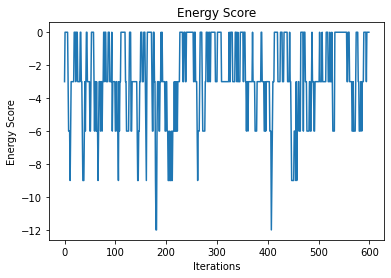

optimal params:  [100, 0.95, 600, -12, 'HHHPHHHPHH']
NNNESSENN 9
HHHPHHHPHH 10


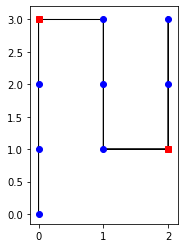

Temp                   100
Cooling Rate          0.95
Iters                  600
Energy Score           -12
Sequence        HHHPHHHPHH
Name: 0, dtype: object


In [47]:
temperatures = list(range(100, 250, 10))
iters = 600
cooling = np.arange(0.95, 0.999, 0.003)
folded_path = "NNNESSENN"

optimal_seq = annealing_protein_design(folded_path, 600, list(range(100, 250, 100)), cooling)

In [24]:
optimal_seq

[120, 0.98, 600, -9.0, 'HHHHHHHPHH']